# Regression with Dummy Variables and Interaction Terms

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_72561/3050238647.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = results.params[0]
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_72561/3050238647.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = results.params[1]
/var/folders/mq/k4my6f796832wdwl98qv078w0000gn/T/ipykernel_72561/3050238647.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b2 

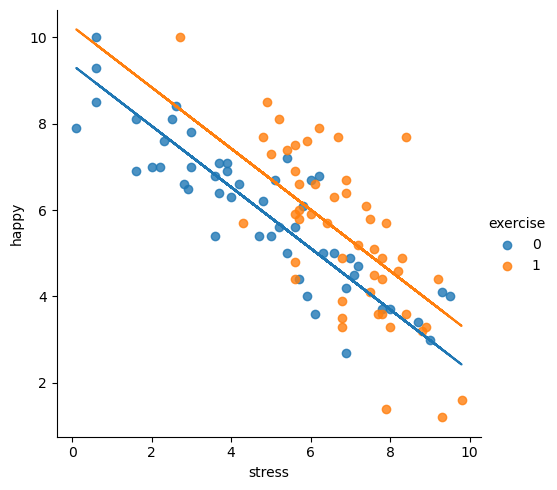

In [3]:
#Dummy / Categorical Variable
df = pd.read_csv('../Data/mood.csv')

model = sm.OLS.from_formula('happy ~ stress + exercise', data=df)
results = model.fit()

stress = df.stress
exercise = df.exercise

b0 = results.params[0]
b1 = results.params[1]
b2 = results.params[2]

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_wi_ex = b0 + (b1 * stress) + (b2 * 1) 

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=df)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_wi_ex)

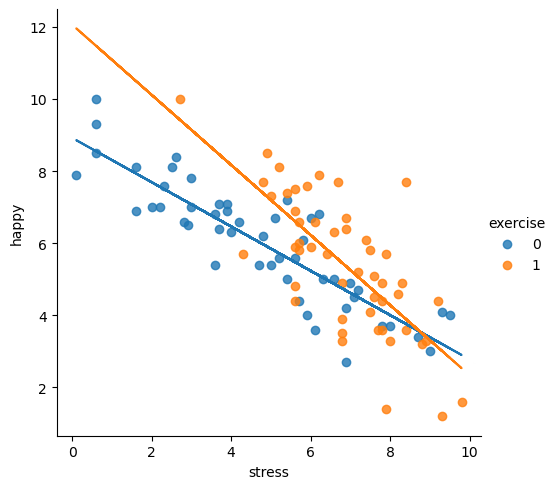

In [34]:
#Categorical interaction term - Slopes and intercepts vary
model = sm.OLS.from_formula('happy ~ stress + exercise + stress:exercise', data=df)
results = model.fit()
stress = df.stress
exercise = df.exercise

b0 = results.params[0] #intercept
b1 = results.params[1] #stress
b2 = results.params[2] #exercise
b3 = results.params[3] #stress * exercise (interaction)

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_w_ex = b0 + (b1 * stress) + (b2 * 1) + (b3 * stress * 1)

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=df)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_w_ex)

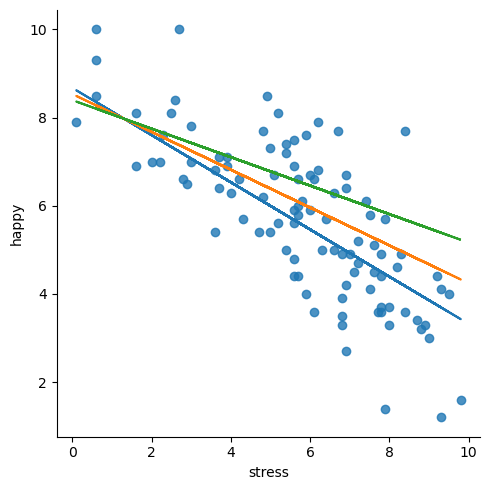

In [36]:
#Continuous interaction term
model = sm.OLS.from_formula('happy ~ stress + sleep + stress:sleep', data=df)
results = model.fit()
stress = df.stress
exercise = df.exercise
sleep = df.sleep

b0 = results.params[0]
b1 = results.params[1]
b2 = results.params[2]
b3 = results.params[3]

happy_sleep6 = b0 + (b1 * stress) + (b2 * 6) + (b3 * stress * 6)
happy_sleep9 = b0 + (b1 * stress) + (b2 * 9) + (b3 * stress * 9)
happy_sleep12 = b0 + (b1 * stress) + (b2 * 12) + (b3 * stress * 12)

sns.lmplot(x='stress', y='happy', fit_reg=False, data=df)
plt.plot(stress, happy_sleep6)
plt.plot(stress, happy_sleep9)
plt.plot(stress, happy_sleep12)